In [50]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [52]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA
pca = PCA(2)
mat_reduced = pca.fit_transform(x)
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

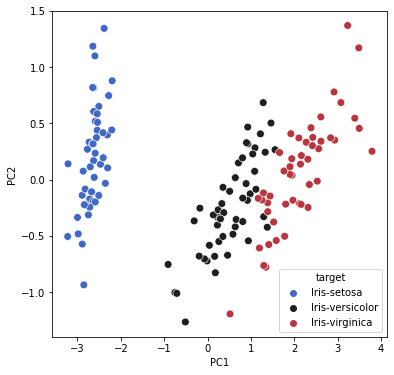

In [53]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire');

# This is Not a homework

In [11]:
import numpy as np

class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        tmp = X - X.mean(axis=0)
        cov = np.cov(tmp.T)
        eigval, eigvec = np.linalg.eig(cov)
        s = eigval.argsort()[::-1]
        self.eval = eigval[s]
        self.evec = eigvec[:, s]
        self.nvec = self.evec[:, :self.n_components]
        self.nvec[:, 1] *= -1
        
    def transform(self, X):
        return (((X - X.mean(axis=0)) @ self.nvec))

In [60]:
pca = PCA(n_components=2)
pca.fit(x)
df =  pd.DataFrame(pca.transform(x))
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([df , pd.DataFrame(target)] , axis = 1)

Index([0, 1, 'target'], dtype='object')


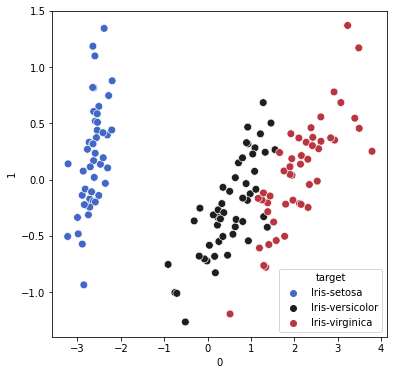

In [61]:
plt.figure(figsize = (6,6))
print(principal_df.columns)
sb.scatterplot(data = principal_df , x = 0, y = 1 , hue = 'target' , s = 60 , palette= 'icefire');

# This is homework

In [43]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

### For different number of componentns apply PCA to X
### Check accuracy on test,  time needed for transforming data and fitting the model
### Create a table as shown below (number of components in the table are not mandatory to use)
### You can apply some scalings to the dataset if you find it neccessary

![title](table.png)

In [44]:
import time
import random
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# TODO

In [45]:
accuracy = []
fit_time = []
transform_time = []
X = X/256
n_components = [2, 16, 49, 98, 196]

In [46]:
for i in n_components:
    model = PCA(n_components=i)
    model.fit(X)
    red_data = model.transform(X)
    print(red_data)
    log_model = LogisticRegression(max_iter=500)
    
    # fitting time
    start_fit = time.time()
    log_model.fit(red_data, y)
    end_fit = time.time()
    fit_time.append(end_fit-start_fit)
    
    # transforming time
    start_transform = time.time()
    pred = log_model.predict(red_data)
    end_transform = time.time()
    transform_time.append(end_transform-start_transform)
    # accuracy
    accuracy.append(sum(y==pred)/len(y))

              0         1
0      0.477560  1.235288
1      3.947242  1.132670
2     -0.230453 -1.537881
3     -3.113145  2.372739
4     -1.528590 -2.850798
...         ...       ...
69995  1.194117  2.147051
69996  2.223383  2.730574
69997 -1.060574 -2.304994
69998 -1.211816  0.455965
69999  4.136180  0.325752

[70000 rows x 2 columns]
             0         1         2         3         4         5         6   \
0      0.477560  1.235288 -0.199734 -2.175383  0.192227  0.847927  0.912943   
1      3.947242  1.132670  2.250472 -1.894857  3.287025  0.568231 -0.188802   
2     -0.230453 -1.537881 -0.632805  2.067269  1.223279 -0.035040 -3.363243   
3     -3.113145  2.372739  1.154386  0.426222 -0.100259 -2.726012 -1.853547   
4     -1.528590 -2.850798  0.054324 -0.948805 -0.385832 -0.140335 -0.341633   
...         ...       ...       ...       ...       ...       ...       ...   
69995  1.194117  2.147051 -0.087214  1.085720 -3.315258 -3.615259  3.055336   
69996  2.223383  2.730574 -3.2

            0         1         2         3         4         5         6    \
0      0.477560  1.235288 -0.199734 -2.175383  0.192227  0.847927  0.912943   
1      3.947242  1.132670  2.250472 -1.894857  3.287025  0.568231 -0.188802   
2     -0.230453 -1.537881 -0.632805  2.067269  1.223279 -0.035040 -3.363243   
3     -3.113145  2.372739  1.154386  0.426222 -0.100259 -2.726012 -1.853547   
4     -1.528590 -2.850798  0.054324 -0.948805 -0.385832 -0.140335 -0.341633   
...         ...       ...       ...       ...       ...       ...       ...   
69995  1.194117  2.147051 -0.087214  1.085720 -3.315258 -3.615259  3.055336   
69996  2.223383  2.730574 -3.259181 -0.621052 -0.368323  0.747871  2.627667   
69997 -1.060574 -2.304994  1.333472 -1.699198 -2.631447 -0.545661 -0.152820   
69998 -1.211816  0.455965  2.483281 -1.103551  0.606499  1.077804  0.604809   
69999  4.136180  0.325752  2.856805  3.090059 -0.694105  2.771165  1.888423   

            7         8         9    ...       186 

In [48]:
data = np.array([n_components, transform_time, fit_time, accuracy]).T
pd.DataFrame(data, columns=['n_components', 'fitting_time', 'transformation_time', 'accuracy'])

,n_components,fitting_time,transformation_time,accuracy
0,2.0,0.009101,3.491157,0.444086
1,16.0,0.008233,4.169253,0.854657
2,49.0,0.014297,5.562083,0.909314
3,98.0,0.020939,9.241869,0.921971
4,196.0,0.035090,19.179504,0.929700
